In [44]:
# Загружаем бибилотеки:
# для работы с математикой
import numpy as np  
# для работы со статистикой
from scipy import stats
# для построения графиков
import matplotlib.pyplot as plt
# для работы с массивами данных
import pandas as pd

### Задание 0

In [112]:
# Исходные данные:
Δ = 3 # Требуемая погрешность
D = 225 # Дисперсия
𝛽 = 0.95 # Уровень доверия

# Для двустороннего интервала нужно к уровню доверия добавить ещё половину от уровня значимости
Z = stats.norm.ppf((1 + 𝛽) / 2) # Квантиль нормального распределения
# Считаем необходимый объём выборки для известного стондартного отклонения
# Округляем вверх
n = np.ceil(((Z * D ** 0.5) / Δ) ** 2)
print (f'Необходимый объём выборки n = {int(n)}')

Необходимый объём выборки n = 97


### Задание 1

In [111]:
# Исходные данные:
𝛽 = 0.98 # Уровень доверия
n = 25 # Объём выборки 
x_mean = 130 # Cреднее значение по выборке
𝜎 = 15 # Стандартное отклонение

# Квантиль нормального распределения
Z = stats.norm.ppf((1 + 𝛽) / 2)
# Считаем погрешность для среднего с известной дисперсией
Δ = (𝜎 / (n ** 0.5)) * Z
# Длина доверительного интервала
L = round(2 * Δ, 2)
print (f'Длина доверительного интервала L = {int(L)}')

Длина доверительного интервала L = 13


### Задание 2

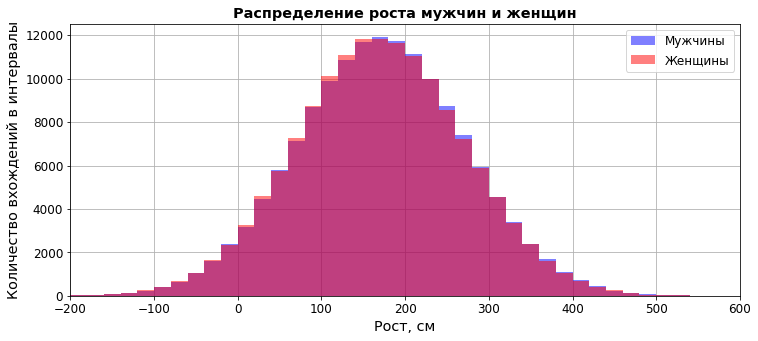

Показано наложение гистограмм распеределений выборок для мужчин и женщин. На первый взгляд распределения неотличимы. Невероятным выглядит наличие отрицательного роста и роста выше 3 метров!
Нулевая гипотеза (H0): средние значения роста мужчин и женщин не отличаются
Альтернативная гипотеза (H1): средние значения роста мужчин и женщин различаются
Расчётное значение t-критерия = 3.66, p_value = 0.00025
Так как полученное p-значение 0.00025 "превосходит" уровень значимости 0.001, то отвергаем нулевую гипотезу и делаем вывод о статистически значимой разнице между средними значениями роста мужчин и женщин


In [151]:
# Исходные данные
np.random.seed(42) #фиксация случайности
mens = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
𝛼 = 0.001 # Уровень значимости

# Покажем визуально гистограммы выборок
plt.figure(figsize=(12, 5)) # Размер поля графиков
plt.hist(x = mens, # Гистограмма для выборки мужчин
         bins = range(-200, 600, 20), # Интервалы гистораммы
         color = 'blue', # Цвет столбцов
         alpha = 0.5, # Прозрачность столбцов
         zorder = 2,
         label = 'Мужчины'
         )
plt.hist(x = womens,
         bins = range(-200, 600, 20), 
         color = 'red',
         alpha = 0.5,     
         zorder = 2,
         label = 'Женщины'
         )
# Основная сетка
plt.grid()
# Пределы по осям и надписи
plt.xlim(-200, 600)
plt.tick_params(labelsize = 'large')
plt.title('Распределение роста мужчин и женщин', fontsize = 'x-large', fontweight = 'bold')
plt.xlabel('Рост, см', fontsize = 'x-large')
plt.ylabel('Количество вхождений в интервалы', fontsize = 'x-large')
plt.legend(fontsize = 'large')
plt.show()

print('Показано наложение гистограмм распеределений выборок для мужчин и женщин. На первый взгляд распределения неотличимы. Невероятным выглядит наличие отрицательного роста и роста выше 3 метров!')
# Использем t-Тест Стьдента для сравнения средних величин двух независимых выборок
t, p_value = stats.ttest_rel(a = mens, b = womens)
print('Нулевая гипотеза (H0): средние значения роста мужчин и женщин не отличаются')
print('Альтернативная гипотеза (H1): средние значения роста мужчин и женщин различаются')
print(f'Расчётное значение t-критерия = {round(t, 2)}, p_value = {round(p_value, 5)}')
print(f'Так как полученное p-значение {round(p_value, 5)} "превосходит" уровень значимости {𝛼}, то отвергаем нулевую гипотезу и делаем вывод о статистически значимой разнице между средними значениями роста мужчин и женщин')


### Задание 3

In [110]:
# Исходные данные
𝜎 = 150 # Cтандартное отклонение  
𝛽 = 0.95 # Уровень доверия 
Δ = 50 # Погрешность  

# Квантиль нормального распределения для двустороннего интервала
Z = stats.norm.ppf((1 + 𝛽) / 2) 
# Необходимый объём выборки
n = np.ceil(((Z * 𝜎) / Δ) ** 2)
print (f'Необходимый объём выборки n = {int(n)}')

Необходимый объём выборки n = 35


### Задание 4

In [54]:
# Исходные данные
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
𝛼 = 0.05 # Уровень значимости

# Получаем точный критерий Фишера
odds_ratio, p_value = stats.fisher_exact(observations)
print('Нулевая гипотеза (H0): предстказания случайны')
print('Альтернативная гипотеза (H1): предсказания способны прогнозировать погоду')
print(f'Точный критерий Фишера даёт расчётное p-значение = {round(p_value, 2)}')
print(f'Так как значение точного критерия Фишера {round(p_value, 2)} больше уровня значимости {𝛼}, то принимаем нулевую гипотезу и делаем вывод об отсутствии статистически значимого преимущества предсказаний')

Нулевая гипотеза (H0): предстказания случайны
Альтернативная гипотеза (H1): предсказания способны прогнозировать погоду
Точный критерий Фишера даёт расчётное p-значение = 0.35
Так как значение точного критерия Фишера 0.35 больше уровня значимости 0.05, то принимаем нулевую гипотезу и делаем вывод об отсутствии статистически значимого преимущества предсказаний


### Задание 5

In [139]:
# Исходные данные
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
𝛽 = 0.9 # Уровень доверия 

# Создадим функцию для расчёта доверительного интервала
def mean_confidence_interval(data, confidence):
    n = len(data) # Количество элементов в выборке
    if n < 30:
        return('В выборке слишком мало элементов: невозможно рассчитать выборочное стандартное отклонение')
    mean = np.mean(data) # Среднее арифметическое
    s = np.std(data, ddof = 1) # Выборочное стандартное отклонение
    # Выборка боее 30 элементов не является малой, поэтому используем нормальное распределение, а не Стьюдента
    Z = stats.norm.ppf((1 + confidence) / 2) # Квантиль нормального распределения для двустороннего интервала
    delta = (s / (n ** 0.5)) * Z
    return (mean - delta, mean, mean + delta)

low, mid, high = mean_confidence_interval(data, confidence = 𝛽)
print(f'Доверительный интервал с уровнем доверия {𝛽}:\n- нижняя граница {round(low, 2)}\n- центр {round(mid, 2)}\n- верхняя граница {round(high, 2)}')

Доверительный интервал с уровнем доверия 0.9:
- нижняя граница 6.09
- центр 6.63
- верхняя граница 7.17


### Задание 6

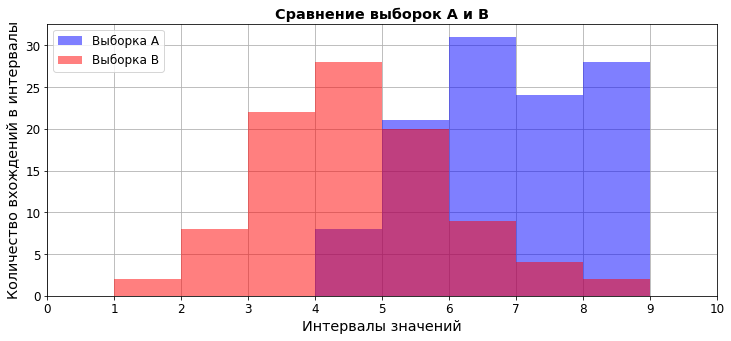

По графику видно, что распределения выборок А и В различаются.
Нулевая гипотеза (H0): средние значения распределений не отличаются
Альтернативная гипотеза (H1): средние значения распределений различаются
Расчётное значение t-критерия 11.8 гораздо выше критического значения 2,6 для уровня значимости 0,01. Это позволяет отвергнуть нулевую гипотезу и сделать вывод о статистически значимом различии средних значений выборок А и В


In [178]:
# Исходные данные
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]
B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

# Покажем визуально гистограммы выборок
plt.figure(figsize=(12, 5)) # Размер поля графиков
plt.hist(x = A, # Гистограмма для первой выборки
         bins = range(0, 10), # Интервалы гистораммы
         color = 'blue', # Цвет столбцов
         alpha = 0.5, # Прозрачность столбцов
         zorder = 2,
         label = 'Выборка A'
         )
plt.hist(x = B,
         bins = range(0, 10), 
         color = 'red',
         alpha = 0.5,     
         zorder = 2,
         label = 'Выборка B'
         )
# Основная сетка
plt.grid()
# # Пределы по осям и надписи
plt.xlim(0, 10)
plt.xticks(range(0, 11))
plt.tick_params(labelsize = 'large')
plt.title('Сравнение выборок А и В', fontsize = 'x-large', fontweight = 'bold')
plt.xlabel('Интервалы значений', fontsize = 'x-large')
plt.ylabel('Количество вхождений в интервалы', fontsize = 'x-large')
plt.legend(fontsize = 'large')
plt.show()
print('По графику видно, что распределения выборок А и В различаются.')

# Проверим с помощью t-теста Стьдента
# Функция stats.ttest_rel() требует одинаковые размерности выборок, поэтому реализуем расчёты самостоятельно
t_value = (np.mean(A) - np.mean(B)) / ((np.var(A, ddof = 1) / len(A) + np.var(B, ddof = 1) / len(B)) ** 0.5)
print('Нулевая гипотеза (H0): средние значения распределений не отличаются')
print('Альтернативная гипотеза (H1): средние значения распределений различаются')
print(f'Расчётное значение t-критерия {round(t_value, 2)} гораздо выше критического значения 2,6 для уровня значимости 0,01. Это позволяет отвергнуть нулевую гипотезу и сделать вывод о статистически значимом различии средних значений выборок А и В')
# print(f'Так как значение точного критерия Фишера {round(p_value, 2)} бол

### Задание 7

Сперва необходимо задать требуемый уровень значимости. В большинстве случаев его принимают 0,05. Так как уровень значимости теста p-value = 0.03 "превосходит" требуемый уровень значимости, то отвергаем нулевую гипотезу и делаем вывод о том, что распределение не является нормальным. Если необходима повышенная точность, например требуемый уровень значимости 0,01, то полученные результаты не позволяют отвергнуть нулевую гипотезу.

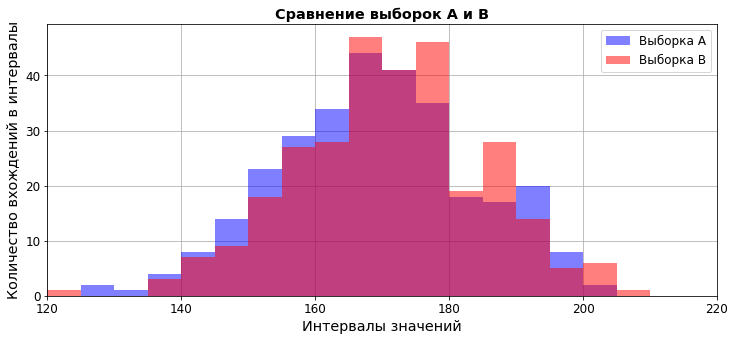

По графику видно, что распределения выборок А и В визуально различаются слабо
Нулевая гипотеза (H0): эффективность препаратов А и В одинакова
Альтернативная гипотеза (H1): эффективность препаратов А и В различается
Расчётное p-значение 0.04 "превосходит" требуемый уровень значимости 0,05, что позволяет отвергнуть нулевую гипотезу и сделать вывод о статистически значимом различии эффективности препаратов А и В
Различия в эффективности препаратов А и В значимы при p-значении не более 0,05, минимального значения не существует


In [196]:
# Исходные данные
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

# Покажем визуально гистограммы выборок
plt.figure(figsize=(12, 5)) # Размер поля графиков
plt.hist(x = A, # Гистограмма для первой выборки
         bins = range(120, 220, 5), # Интервалы гистораммы
         color = 'blue', # Цвет столбцов
         alpha = 0.5, # Прозрачность столбцов
         zorder = 2,
         label = 'Выборка A'
         )
plt.hist(x = B,
         bins = range(120, 220, 5), 
         color = 'red',
         alpha = 0.5,     
         zorder = 2,
         label = 'Выборка B'
         )
# Основная сетка
plt.grid()
# # Пределы по осям и надписи
plt.xlim(120, 220)
plt.tick_params(labelsize = 'large')
plt.title('Сравнение выборок А и В', fontsize = 'x-large', fontweight = 'bold')
plt.xlabel('Интервалы значений', fontsize = 'x-large')
plt.ylabel('Количество вхождений в интервалы', fontsize = 'x-large')
plt.legend(fontsize = 'large')
plt.show()
print('По графику видно, что распределения выборок А и В визуально различаются слабо')

# Предположим, что выборки независимы, используем t-тест Стьдента
t, p_value = stats.ttest_rel(a = A, b = B)
print('Нулевая гипотеза (H0): эффективность препаратов А и В одинакова')
print('Альтернативная гипотеза (H1): эффективность препаратов А и В различается')
print(f'Расчётное p-значение {round(p_value, 2)} "превосходит" требуемый уровень значимости 0,05, что позволяет отвергнуть нулевую гипотезу и сделать вывод о статистически значимом различии эффективности препаратов А и В')
print('Различия в эффективности препаратов А и В значимы при p-значении не более 0,05, минимального значения не существует')